### 1. Your current goal is get familiar with the data you were given, so in this task you should create a notebook that would show all data you have

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

        File descriptions

    sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.

    test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.

    sample_submission.csv - a sample submission file in the correct format.

    items.csv - supplemental information about the items/products.

    item_categories.csv  - supplemental information about the items categories.

    shops.csv- supplemental information about the shops.


        Data fields

    ID - an Id that represents a (Shop, Item) tuple within the test set

    shop_id - unique identifier of a shop

    item_id - unique identifier of a product

    item_category_id - unique identifier of item category

    item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

    item_price - current price of an item

    date - date in format dd/mm/yyyy

    date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

    item_name - name of item

    shop_name - name of shop

    item_category_name - name of item category


### Extract

In [2]:
# read data
data_path = "C:\\Repository\\DS-Intership\\data\\"
item_categories = pd.read_csv(data_path + "item_categories.csv")
items = pd.read_csv(data_path + "items.csv")
sales_train = pd.read_csv(data_path + "sales_train.csv")
sample_submission = pd.read_csv(data_path + "sample_submission.csv")
shops = pd.read_csv(data_path + "shops.csv")
test = pd.read_csv(data_path + "test.csv")

In [3]:
print(item_categories.shape)
item_categories.head()

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
print(items.shape)
items.head()

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:

print(sales_train.shape)
sales_train.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
print(shops.shape)
shops.head()

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
print(test.shape)
test.head()

(214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [8]:
sample_submission.head(1)

,ID,item_cnt_month
0,0,0.5


### The second task is Data Quality Check layer.

    Since you would work a lot with your data, it would be useful to create a dqc notebook that would be used to mark all possible issues that your data have:
        1) Outliers
        2) Poor dynamic all a lot of missing information
        3) Data inconsistency
    Note: the main question you should answer in order to understand DQC layer is where is it used, so we use DQC in order to create ETL layer or conduct a data extraction

In [9]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [10]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849.0,2935849.0,2935849.0,2935849.0,2935849.0
mean,14.6,33.0,10197.2,890.9,1.2
std,9.4,16.2,6324.3,1729.8,2.6
min,0.0,0.0,0.0,-1.0,-22.0
25%,7.0,22.0,4476.0,249.0,1.0
50%,14.0,31.0,9343.0,399.0,1.0
75%,23.0,47.0,15684.0,999.0,1.0
max,33.0,59.0,22169.0,307980.0,2169.0


### Mising information & Outliers

In [11]:
# check for NaNs
print(sales_train.isna().sum(), items.isna().sum(), item_categories.isna().sum(), shops.isna().sum(), test.isna().sum())

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64 item_name           0
item_id             0
item_category_id    0
dtype: int64 item_category_name    0
item_category_id      0
dtype: int64 shop_name    0
shop_id      0
dtype: int64 ID         0
shop_id    0
item_id    0
dtype: int64


In [12]:
# negative value of item_price
sales_train[sales_train.item_price <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [13]:
# negative value of item_cnt_day
sales_train[sales_train.item_cnt_day<0].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0


In [14]:
sales_train[sales_train.item_cnt_day < 0].item_cnt_day.count()

7356

<Axes: >

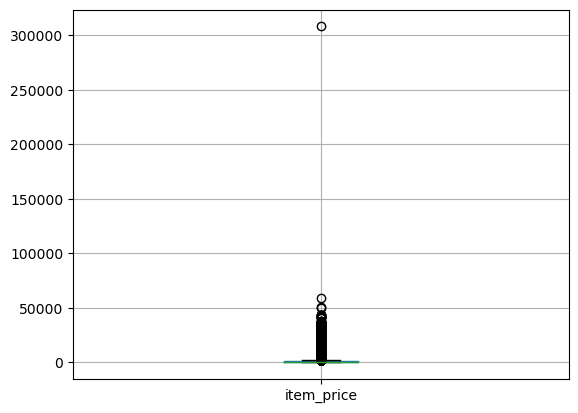

In [15]:
# checking for outliers (item_price)
sales_train.boxplot(column=['item_price'])

In [16]:
df = sales_train[sales_train.item_price < 50000]

In [17]:
# ?
df.boxplot(column=['item_price'])

<Axes: >

In [18]:
# ?
sns.boxplot(data=sales_train["item_price"])

<Axes: >

In [19]:
sns.boxplot(data=sales_train)

<Axes: >

In [20]:
np.asarray(sales_train.item_price)

array([999., 899., 899., ..., 349., 299., 299.])

In [21]:
# also need to check (item_cnt_day)
sales_train.boxplot(column=['item_cnt_day'])

<Axes: >

### Incosistency

In [22]:
# chekc data for incosistency
#   item_categories -> item_category <- items
#   items -> item_id <- sales_train
#   sales_train -> shop_id <- shops
df_inc1 = item_categories.merge(items, on='item_category_id', how='inner')
df_inc2 = items.merge(sales_train, on='item_id', how='inner')
df_inc3 = sales_train.merge(shops, on='shop_id', how='inner')

In [23]:
print(df_inc1.isna().sum())
print(df_inc2.isna().sum())
print(df_inc3.isna().sum())

item_category_name    0
item_category_id      0
item_name             0
item_id               0
dtype: int64
item_name           0
item_id             0
item_category_id    0
date                0
date_block_num      0
shop_id             0
item_price          0
item_cnt_day        0
dtype: int64
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
shop_name         0
dtype: int64


### Transform

In [24]:
# delete data with negative values (item_price, item_cnt_day)
sales_train = sales_train[(sales_train.item_price > 0) & (sales_train.item_cnt_day >= 0)] 

In [25]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
3,06.01.2013,0,25,2554,1709.0,1.0
4,15.01.2013,0,25,2555,1099.0,1.0
5,10.01.2013,0,25,2564,349.0,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0


In [26]:
#delete extremely outlier data
sales_train = sales_train[sales_train.item_price < 100000]

In [27]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2928491.0,2928491.0,2928491.0,2928491.0,2928491.0
mean,14.6,33.0,10200.3,889.4,1.2
std,9.4,16.2,6324.4,1718.2,2.6
min,0.0,0.0,0.0,0.1,1.0
25%,7.0,22.0,4477.0,249.0,1.0
50%,14.0,31.0,9355.0,399.0,1.0
75%,23.0,47.0,15691.0,999.0,1.0
max,33.0,59.0,22169.0,59200.0,2169.0


In [28]:
# preprocess time data
sales_train['date'] = pd.to_datetime(sales_train['date'], dayfirst=True)

C:\Users\maxim\AppData\Local\Temp\ipykernel_3752\261978611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train['date'] = pd.to_datetime(sales_train['date'], dayfirst=True)


In [29]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0
3,2013-01-06,0,25,2554,1709.0,1.0
4,2013-01-15,0,25,2555,1099.0,1.0
5,2013-01-10,0,25,2564,349.0,1.0


In [30]:
# count sales by months
sales_test = sales_train.merge(test, on=['item_id','shop_id'], how='inner')

In [31]:
sales_test["month_year"] = sales_test["date"].dt.to_period("M")

In [32]:
sales_test.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,month_year
0,2013-01-02,0,59,22154,999.0,1.0,150983,2013-01
1,2013-01-03,0,25,2574,399.0,2.0,56520,2013-01
2,2013-01-05,0,25,2574,399.0,1.0,56520,2013-01
3,2013-01-07,0,25,2574,399.0,1.0,56520,2013-01
4,2013-01-08,0,25,2574,399.0,2.0,56520,2013-01


In [33]:
sales_per_months = pd.DataFrame(sales_test.groupby(['month_year', 'ID'])['item_cnt_day'].agg(sum))

In [35]:
sales_per_months = sales_per_months.reset_index('ID').rename(columns={'item_cnt_day':'item_cnt_month'})

In [36]:
sales_per_months

,ID,item_cnt_month
month_year,,
2013-01,5122,1.0
2013-01,5127,3.0
2013-01,5142,2.0
2013-01,5143,9.0
2013-01,5152,1.0
...,...,...
2015-10,213962,1.0
2015-10,214068,1.0
2015-10,214069,1.0


### Load

In [37]:
import os

In [38]:
path_to_load = "C:\\Repository\\DS-Intership\\clean_data\\"
os.makedirs(path_to_load, exist_ok=True) 

In [39]:
item_categories.to_csv(path_to_load +'item_categories.csv')
items.to_csv(path_to_load +'items.csv')
sales_train.to_csv(path_to_load +'sales_train.csv')
sample_submission.to_csv(path_to_load +'sample_submission.csv')
shops.to_csv(path_to_load +'shops.csv')
test.to_csv(path_to_load +'test.csv')
sales_per_months.to_csv(path_to_load +'sales_per_months.csv')

In [40]:
from os import listdir
from os.path import isfile, join
print(*[f+"\n" for f in listdir(path_to_load) if isfile(join(path_to_load, f))])

items.csv
 item_categories.csv
 sales_per_months.csv
 sales_train.csv
 sample_submission.csv
 shops.csv
 test.csv

